<center><h1> Tableau-like in Python with Altair </h1></center>

https://altair-viz.github.io

# Imports

In [2]:
import altair as alt 
import pandas as pd
france = 'france.csv'

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.21.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
pd.read_csv(france, index_col=0).head()

Postal Code         x         y  inseecode                    place  \
0         1400 -0.109745  0.746712       1001  L'Abergement-Clémenciat   
1         1640 -0.104048  0.743398       1002    L'Abergement-de-Varey   
2         1090 -0.111287  0.745728       1003                 Amareins   
3         1500 -0.104951  0.742623       1004        Ambérieu-en-Bugey   
4         1330 -0.110263  0.744135       1005      Ambérieux-en-Dombes   

   population  density  
0         579       36  
1         159       17  
2           0        0  
3       10455      425  
4        1156       73

## Basic chart

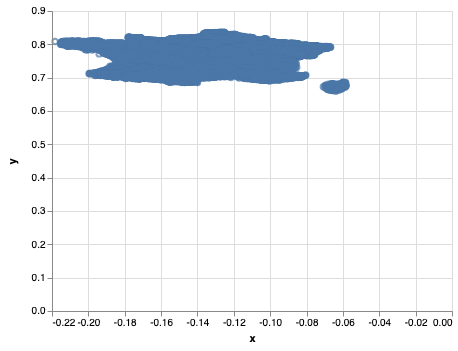

In [6]:
alt.Chart(france).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

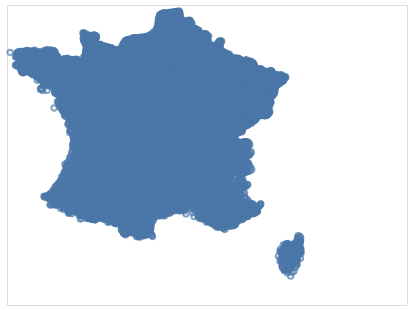

In [10]:
alt.Chart(france).mark_point().encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False))
)

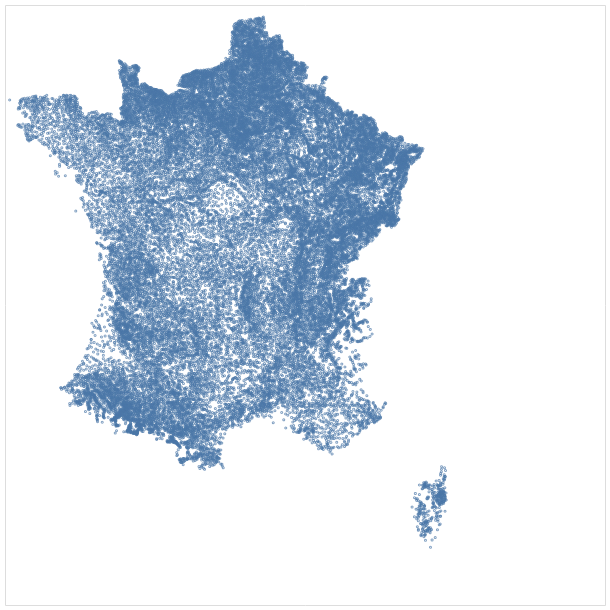

In [11]:
map = alt.Chart(france, width=600, height=600).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)), 
)

map

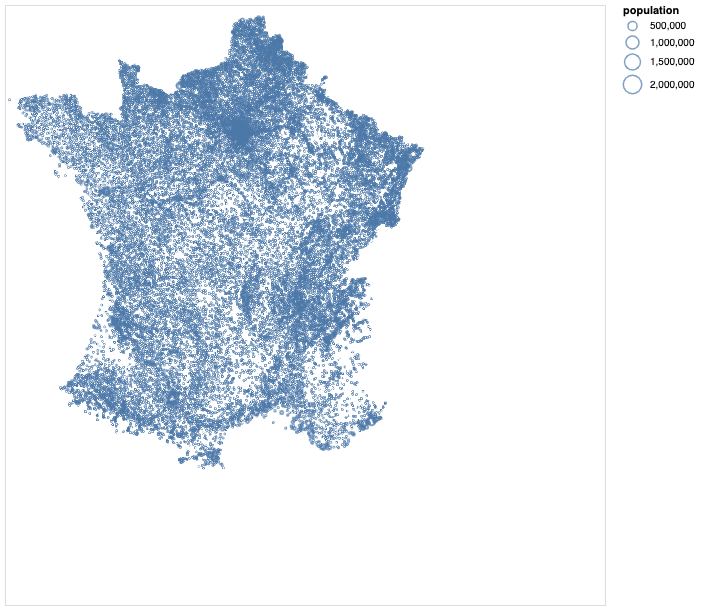

In [26]:
map = alt.Chart(france, width=600, height=600).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)), 
    size=alt.Size('population:Q')
)

map

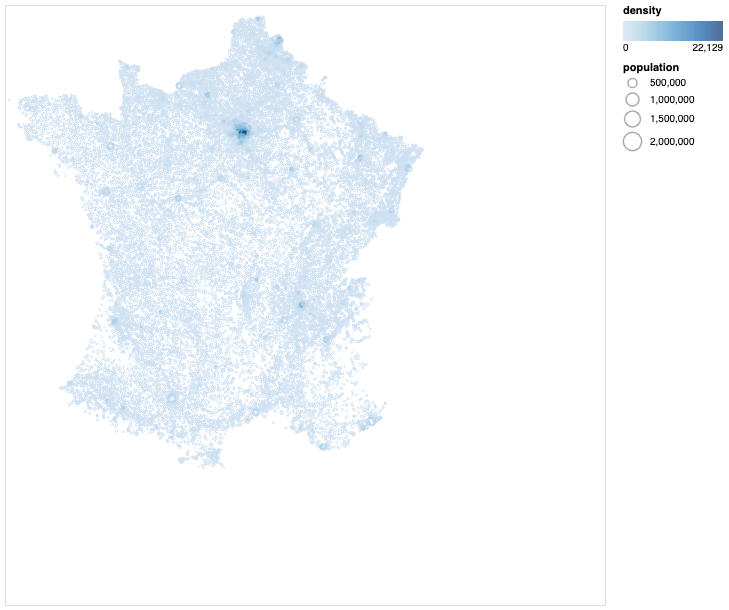

In [28]:
map = alt.Chart(france, width=600, height=600).mark_point(size=0.5).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size=alt.Size('population:Q'),
    color=alt.Color('density:Q')

)

map

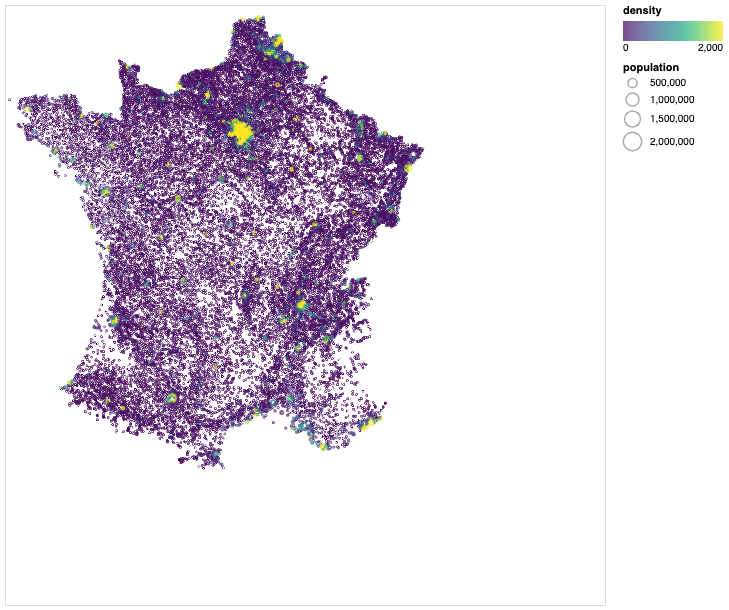

In [29]:
map = alt.Chart(france, width=600, height=600).mark_point(size=0.5).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size=alt.Size('population:Q'),
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis', domain=[0,2000]))

)

map

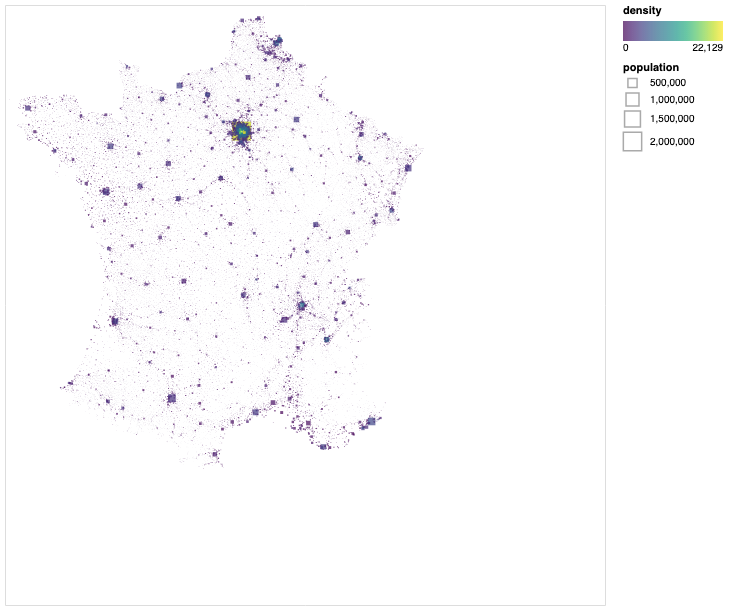

In [51]:
map = alt.Chart(france, width=600, height=600).mark_square(size=1000).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size=alt.Size('population:Q'),
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis'))

)

map

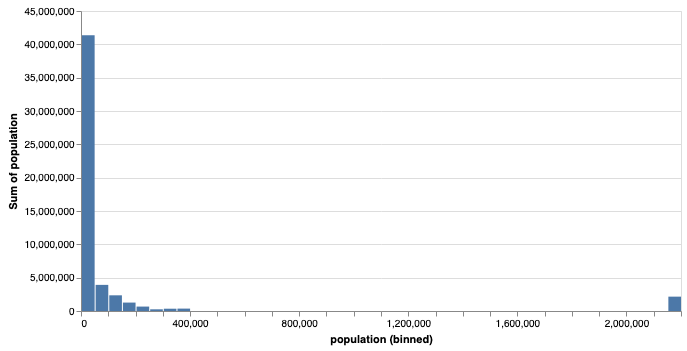

In [52]:
population = alt.Chart(france, width=600, height=300).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=60)),
    y='sum(population):Q'
)

population

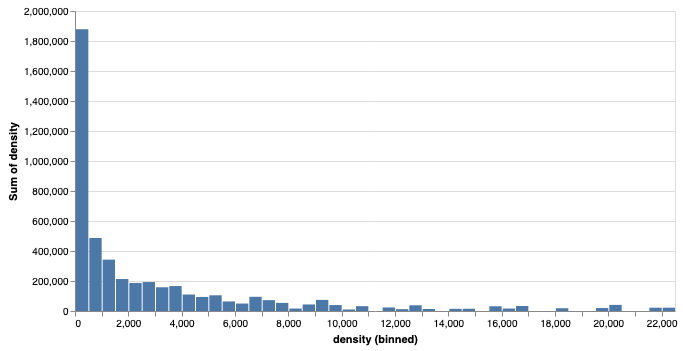

In [53]:
density = alt.Chart(france, width=600, height=300).mark_bar().encode(
    x=alt.X('density:Q', bin=alt.Bin(maxbins=60)),
    y='sum(density):Q'
)

density

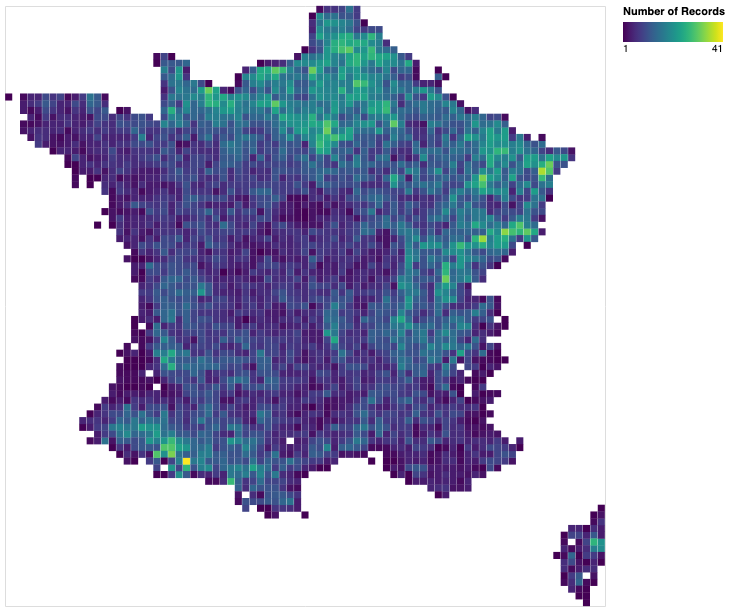

In [49]:
heat_map = alt.Chart(france, width=600, height=600).mark_square(size=50).encode(
    x=alt.X('x:Q', axis=None, bin=alt.Bin(maxbins=90)),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False), bin=alt.Bin(maxbins=90)),
    
    color=alt.Color('count(population):Q', scale=alt.Scale(scheme='viridis'))
)

heat_map

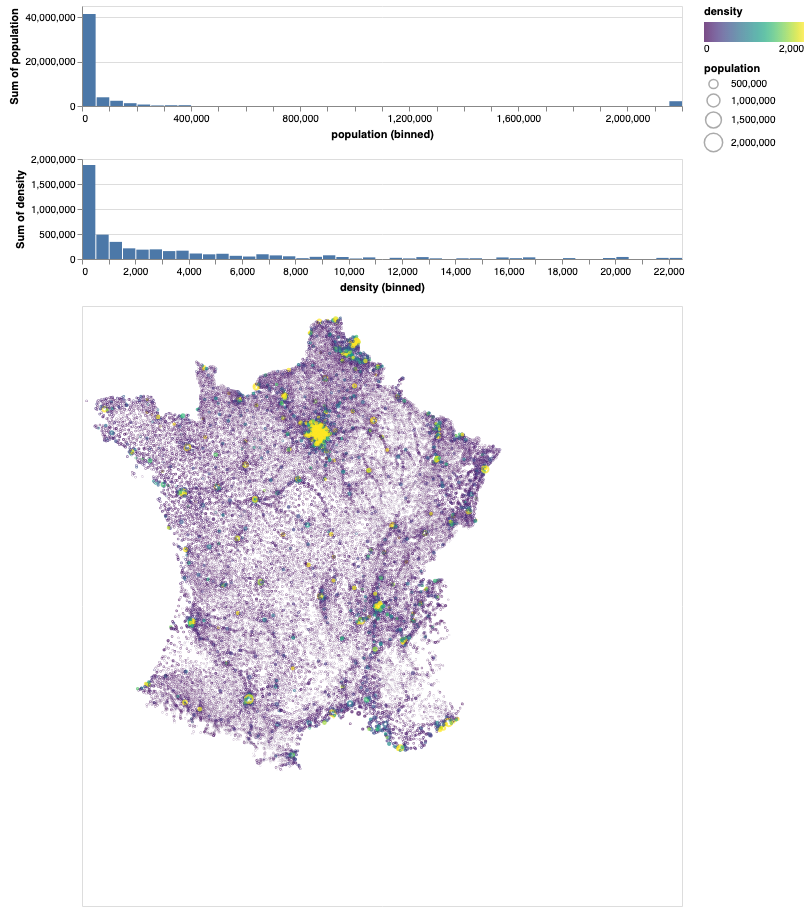

In [57]:
population.properties(height=100) & density.properties(height=100) & map

# Interactive Charts

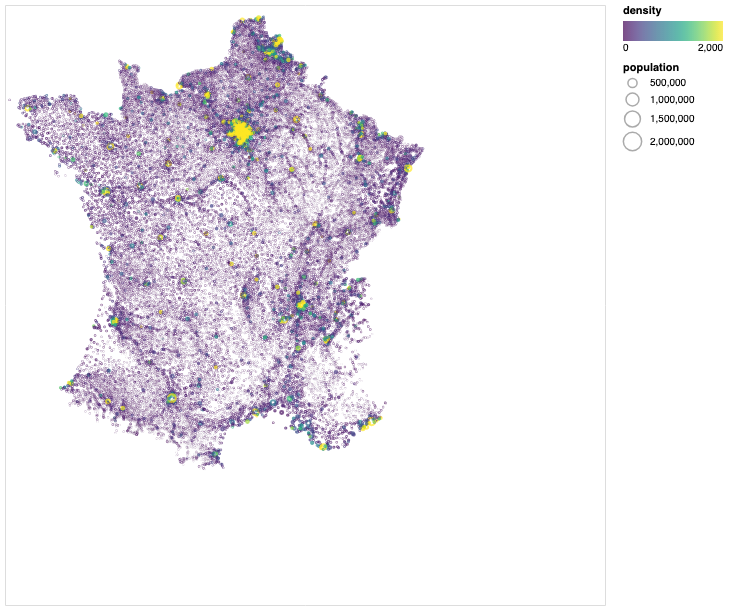

In [54]:
map = alt.Chart(france, width=600, height=600).mark_point(size=0.5).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size=alt.Size('population:Q'),
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.Color('density:Q', scale=alt.Scale(scheme='viridis', domain=[0,2000]))

)

map

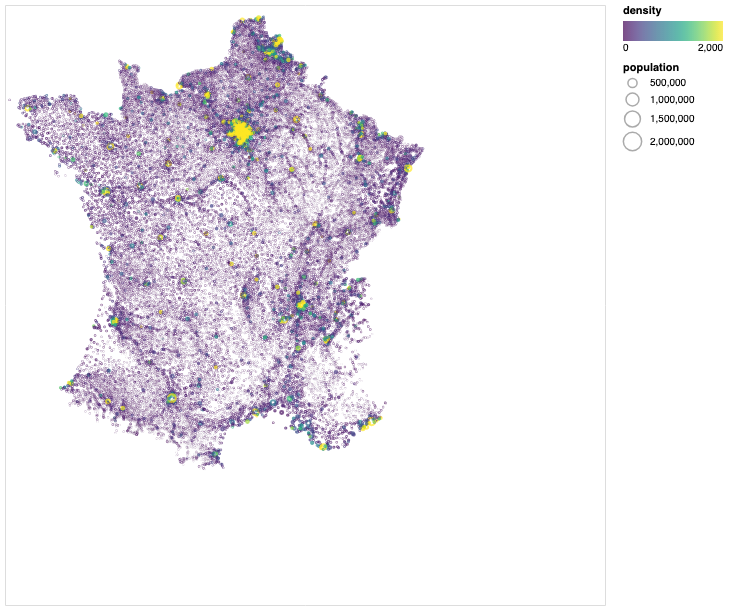

In [58]:
brush = alt.selection_interval()
map.add_selection(brush)

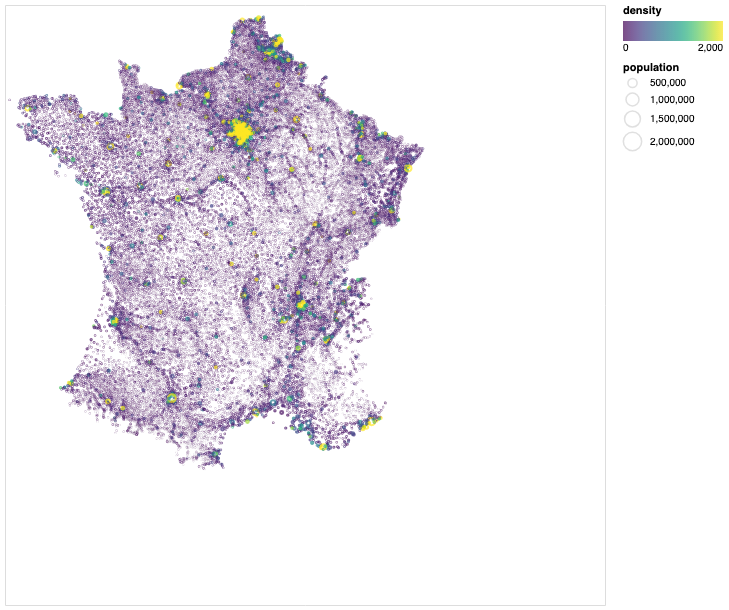

In [59]:
map = alt.Chart(france, width=600, height=600).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    tooltip=['place:N', 'population:Q', 'density:Q'],
    color=alt.condition(brush, 'density:Q', alt.value('lightgrey'), scale=alt.Scale(scheme='viridis', domain=[0,2000]))
).add_selection(brush)

map

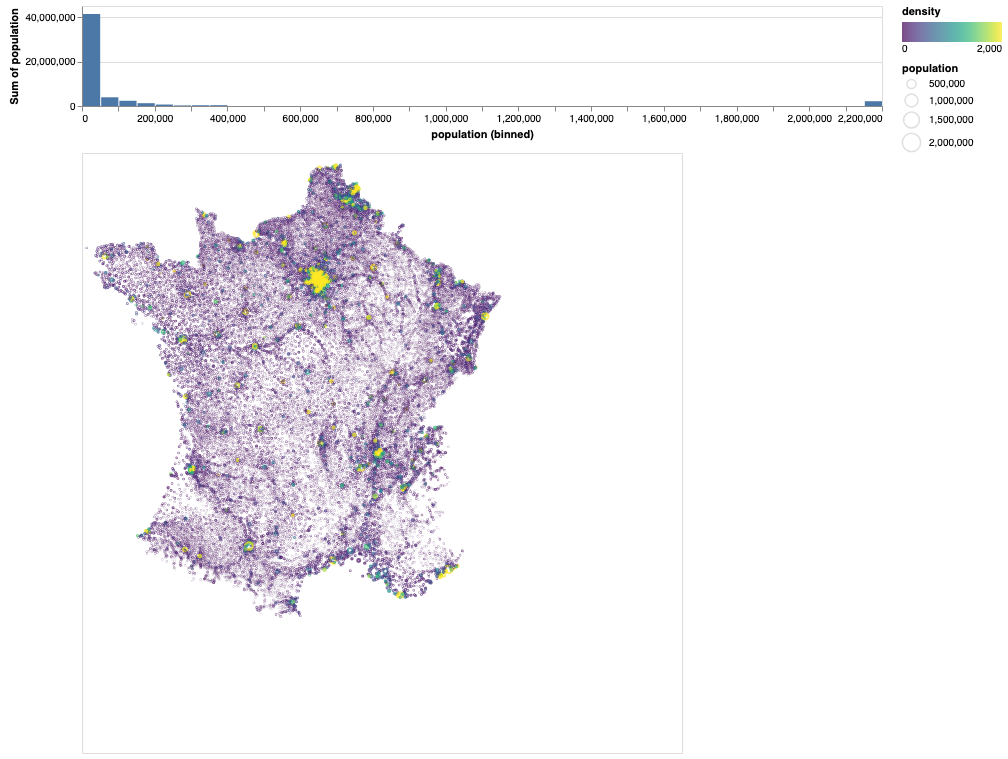

In [60]:
population = population = alt.Chart(france, width=800, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=60)),
    y='sum(population):Q'
).transform_filter(brush)

population & map

In [62]:
brush = alt.selection_interval()
pop_selection = alt.selection_interval(encodings=['x'])

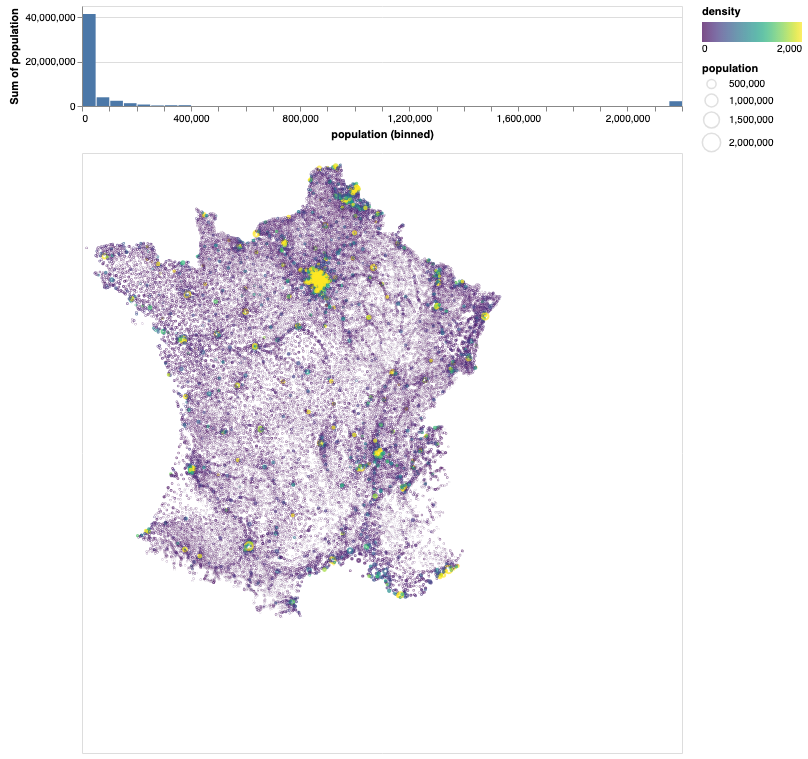

In [64]:
map = alt.Chart(france, width=600, height=600).mark_point(size=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None, scale=alt.Scale(zero=False)),
    size='population:Q',
    color=alt.condition(pop_selection, 'density:Q', alt.value('lightgrey'), scale=alt.Scale(scheme='viridis', domain=[0,2000])),
).add_selection(brush)

population = alt.Chart(france, width=600, height=100).mark_bar().encode(
    x=alt.X('population:Q', bin=alt.Bin(maxbins=50)),
    y='sum(population):Q'
).add_selection(pop_selection).transform_filter(brush)

population & map